# MATH123-HW3
Ethan Harvey

In [418]:
import numpy as np
import pandas as pd

from scipy.spatial.distance import cdist

import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Question 2
(a)

In [419]:
def kmeans(data, n_clusters):
    # randomly initialize first centroid
    centroids = []
    index = np.random.randint(len(data))
    centroids.append(data[index,:])
    new_data = np.delete(data, [index], axis=0)
    
    # initialize other centroids using farthest heuristic
    for _ in range(n_clusters-1):
        distances = np.min(cdist(new_data, centroids, 'euclidean'), axis=1)
        # get first index of datapoint with max min distance
        index = np.where(distances == max(distances))[0][0]
        centroids.append(new_data[index,:])
        new_data = np.delete(new_data, [index], axis=0)
    
    # iterate
    centroids = np.array(centroids)
    old_centroids = np.array([np.array([0,0]) for i in range(n_clusters)])
    
    while not np.linalg.norm(old_centroids - centroids, ord=2, axis=1).all() == 0:
        distances = np.array([[np.linalg.norm(centroid - data[index,:], ord = 2) for index in range(len(data))] for centroid in centroids])
        labels = np.argmin(distances, axis=0)
        # update centroids
        old_centroids = centroids
        centroids = np.array([sum(data[labels==cluster])/len(data[labels==cluster]) for cluster in range(n_clusters)])
        
    return centroids, labels

_, labels = kmeans(np.array([[1,1],[2,2],[10,10],[11,11]]), 3)

(b)

In [420]:
def centered_and_scaled(X):
    centered = np.array([X[:,i]-X[:,i].mean() for i in range(X.shape[1])]).T
    scaled = np.array([centered[:,i]/centered[:,i].std() if not centered[:,i].std() == 0 else centered[:,i] for i in range(X.shape[1])]).T
    return scaled

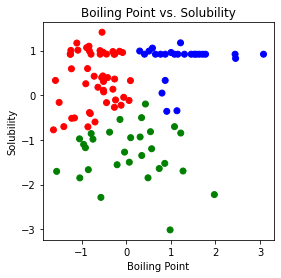

In [421]:
# load .csv
data = pd.read_csv("solvents.csv")[["BoilingPoint","Solubility"]].to_numpy()
# center and scale data
data  = centered_and_scaled(data)
_, labels = kmeans(data, 3)
colors = ['red','green','blue']
colors = [colors[labels[index]] for index in range(len(labels))]
plt.scatter(data[:,0], data[:,1], color=colors)
plt.gca().set_aspect('equal')
plt.ylabel("Solubility")
plt.xlabel("Boiling Point")
plt.title("Boiling Point vs. Solubility")
plt.show()

In [422]:
results = []
for i in range(10):
    _, labels = kmeans(data, 3)
    results.append(labels)
print(np.array(results))

[[2 0 0 ... 1 1 2]
 [0 1 1 ... 2 2 2]
 [0 2 2 ... 1 1 1]
 ...
 [1 2 2 ... 0 0 0]
 [1 2 2 ... 0 0 0]
 [0 2 2 ... 1 1 1]]


The data points do not all belong to the exact same cluster every time the algorithm is run. This is because we randomly initialized the first centroid and so our centroids are not guarenteed to be the same each time the algorithm is run.

(c)

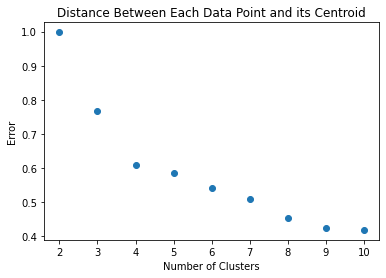

In [423]:
errors = []
for n_clusters in [2,3,4,5,6,7,8,9,10]:
    centroids, labels = kmeans(data, n_clusters)
    errors.append(np.average(np.min(cdist(data, centroids, 'euclidean'), axis=1)))
plt.scatter([2,3,4,5,6,7,8,9,10], errors)
plt.ylabel("Error")
plt.xlabel("Number of Clusters")
plt.title("Distance Between Each Data Point and its Centroid")
plt.show()

Plot the error measure for K = 2, 3, 4, ..., 10, what do you observe? What is a good number of clusters to use and why?

### Question 3
(a)

In [424]:
def project_data(X, number_components):
    X = centered_and_scaled(X)
    cov_matrix = (1/len(X))*X.T@X
    eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
    idx = eigen_values.argsort()[::-1]   
    eigen_values = eigen_values[idx]
    eigen_vectors = eigen_vectors[:,idx]
    pca_vectors = eigen_vectors[:,:number_components]
    X_pca = X@pca_vectors
    return X_pca

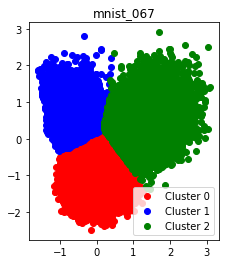

In [425]:
import scipy.io
from sklearn.cluster import KMeans
X = scipy.io.loadmat('mnist_067.mat')['data_067']
X_pca = project_data(X, 2)
kmeans = KMeans(n_clusters=3).fit(np.real(X_pca))
plt.scatter(centered_and_scaled(X_pca)[kmeans.labels_==0,0], 
            centered_and_scaled(X_pca)[kmeans.labels_==0,1], 
            color="red", label="Cluster 0")
plt.scatter(centered_and_scaled(X_pca)[kmeans.labels_==1,0], 
            centered_and_scaled(X_pca)[kmeans.labels_==1,1], 
            color="blue", label="Cluster 1")
plt.scatter(centered_and_scaled(X_pca)[kmeans.labels_==2,0], 
            centered_and_scaled(X_pca)[kmeans.labels_==2,1], 
            color="green", label="Cluster 2")
plt.gca().set_aspect('equal')
plt.title("mnist_067")
plt.legend()
plt.show()

(b)

Recall the results of problem 6 in HW3. Given those results, what could you conclude about your result in (a) ?